In [1]:
import numpy as np
import pylab as mplot

%pylab inline


import pickle
with open("../SPmap_linefit.pk", "rb") as file_pk:
    LineFit_read = pickle.load(file_pk)

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


From shear cat
* T ratio 
* s/n
* (PSF e1)
* (PSF e2)

From Peter’s maps
* Depth i
* Brightness i
* Exp time i
* Airmass i
* Seeing i


In [2]:
LineFit_read

{'delve_dr3_1_1_r_airmass_wmean': (0.00014724355305547858,
  -0.00016504759501420068,
  array([[ 5.24203865e-08, -7.49523512e-08],
         [-7.49523512e-08,  1.09760024e-07]]),
  -0.00014487258410960708,
  -0.0004501054017420081,
  array([[ 6.77552043e-08, -9.68828958e-08],
         [-9.68828958e-08,  1.41877972e-07]])),
 'delve_dr3_1_1_g_airmass_wmean': (3.5076615832713316e-05,
  2.962914251011959e-06,
  array([[ 4.39475787e-08, -6.09511456e-08],
         [-6.09511456e-08,  8.71608397e-08]]),
  -0.0001890334033872803,
  -0.00039219201788524773,
  array([[ 4.21969732e-08, -5.85159350e-08],
         [-5.85159350e-08,  8.36667679e-08]])),
 'delve_dr3_1_1_i_airmass_wmean': (9.52243983557398e-05,
  -8.920900954405922e-05,
  array([[ 8.11971480e-08, -1.12379911e-07],
         [-1.12379911e-07,  1.59760729e-07]]),
  -0.00032502229158598046,
  -0.0002033564724578992,
  array([[ 3.52847303e-08, -4.88353428e-08],
         [-4.88353428e-08,  6.94243121e-08]])),
 'delve_dr3_1_1_z_airmass_wmean':

In [23]:
Y1 = []
Y2 = []
for key in LineFit_read.keys():
    out = LineFit_read[key]
    y1 = out[0]/out[2][0][0]**0.5
    y2 = out[3]/out[5][0][0]**0.5
    print(key, y1, y2)
    Y1.append(y1)
    Y2.append(y2)

delve_dr3_1_1_r_airmass_wmean 0.6431113573370514 -0.5565636994349853
delve_dr3_1_1_g_airmass_wmean 0.16732090696686427 -0.9202332119902193
delve_dr3_1_1_i_airmass_wmean 0.3341779955967826 -1.7302933819238284
delve_dr3_1_1_z_airmass_wmean -0.6287069086016511 -0.9169078337582515
delve_dr3_1_1_z_dcr_dra_wmean -0.36007762391798065 0.11563200842994312
delve_dr3_1_1_g_dcr_ddec_wmean 0.611139168968117 1.5083821301597606
delve_dr3_1_1_z_dcr_ddec_wmean 0.8385945327745136 1.2128644948276959
delve_dr3_1_1_z_dcr_e1_wmean -0.03436279480983319 -1.347945380631114
delve_dr3_1_1_i_dcr_dra_wmean -1.437822555333468 0.2623654293374151
delve_dr3_1_1_z_dcr_e2_wmean 0.916663079311959 0.8538831143990335
delve_dr3_1_1_r_dcr_e2_wmean 0.6073969248730009 0.13619399228292142
delve_dr3_1_1_r_dcr_e1_wmean -0.49499746493465574 -1.6722186857480075
delve_dr3_1_1_i_dcr_ddec_wmean 0.6828085020698094 1.2412314325857314
delve_dr3_1_1_g_dcr_e2_wmean 0.522785266325433 -0.43004067070759067
delve_dr3_1_1_r_dcr_dra_wmean -0.881

(array([1., 0., 0., 0., 0., 1., 1., 0., 2., 3., 0., 3., 6., 4., 4., 4., 0.,
        2., 3., 2., 4., 0., 1., 2., 2., 1., 1., 2., 2., 1.]),
 array([-2.51885902, -2.38461764, -2.25037627, -2.1161349 , -1.98189353,
        -1.84765216, -1.71341079, -1.57916941, -1.44492804, -1.31068667,
        -1.1764453 , -1.04220393, -0.90796256, -0.77372119, -0.63947981,
        -0.50523844, -0.37099707, -0.2367557 , -0.10251433,  0.03172704,
         0.16596842,  0.30020979,  0.43445116,  0.56869253,  0.7029339 ,
         0.83717527,  0.97141664,  1.10565802,  1.23989939,  1.37414076,
         1.50838213]),
 <BarContainer object of 30 artists>)

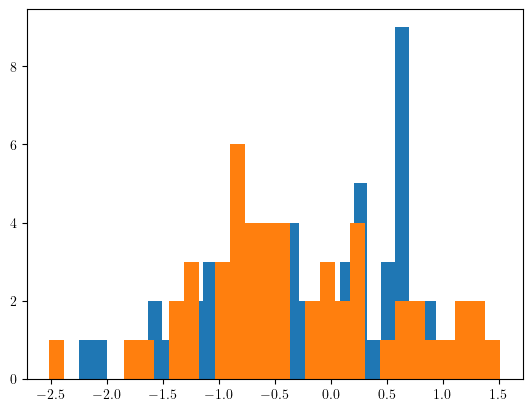

In [25]:
mplot.hist(Y1[:-5], bins=30)
mplot.hist(Y2[:-5], bins=30)

In [3]:
list_plot = ['delve_dr3_1_1_i_maglim_wmean', 'delve_dr3_1_1_i_skybrite_wmean', 'delve_dr3_1_1_i_exptime_sum', 'delve_dr3_1_1_i_airmass_wmean', 'delve_dr3_1_1_i_fwhm_wmean'] #, 'size_ratio', 's2n'] #, 'psf_e1', 'psf_e2']
sp_title = ['Depth i', 'Brightness i', 'Exp time i', 'Airmass i', 'Seeing i'] #, '$T/T_{\\rm PSF}$', 'SNR'] #, '$e_{\\rm 1, PSF}$', '$e_{\\rm 2, PSF}$']

Y1 = []
Y2 = []
for i in range(len(list_plot)):
    out = LineFit_read[list_plot[i]]
    y1 = out[0]/out[2][0][0]**0.5
    y2 = out[3]/out[5][0][0]**0.5
    Y1.append(y1)
    Y2.append(y2)

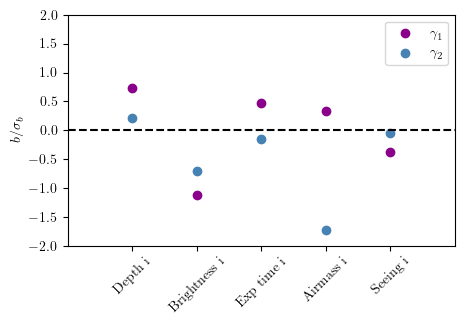

In [8]:
mplot.figure(figsize=(5,3))
ax = mplot.subplot(111)
mplot.scatter(np.arange(5), Y1, color='darkmagenta', label='$\gamma_1$')
mplot.scatter(np.arange(5), Y2, color='steelblue', label='$\gamma_2$')
mplot.plot([-1,5], [0,0], ls='--', color='k')
mplot.ylim(-2,2)
mplot.xlim(-1,5)
mplot.ylabel('$b / \sigma_{b}$')
x = [0,1,2,3,4]
ax.set_xticks(x)
ax.set_xticklabels(sp_title, minor=False, rotation=45)
mplot.legend()

mplot.savefig('SP_g.pdf', bbox_inches='tight')